In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
df = pd.read_csv('1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_data = df['State'].values
label_encoder = LabelEncoder()
cat_data_encoded = label_encoder.fit_transform(cat_data)


In [74]:
df['State'] = cat_data_encoded
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


<Axes: >

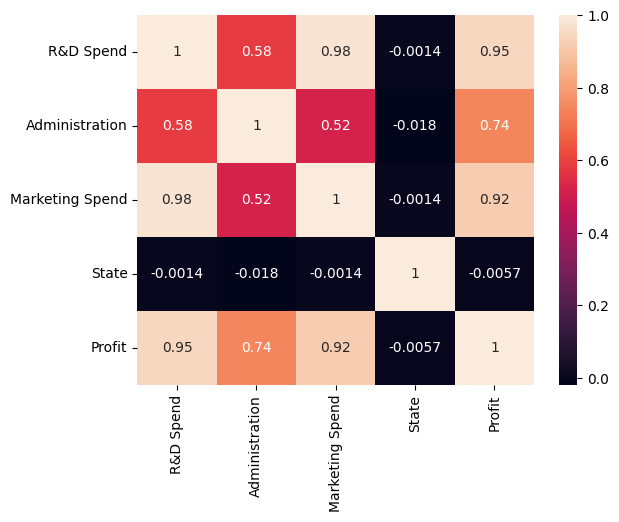

In [76]:
sns.heatmap(df.corr(), annot=True)

In [36]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [41]:
len(X_train)

750

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [44]:
Y_pred = regressor.predict(X_test)

In [45]:
regressor.coef_

array([ 5.26512651e-01,  9.03566864e-01,  1.02337389e-01, -2.38604774e+02])

In [50]:
regressor.intercept_

-57545.85107047533

In [52]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9209548650003683

In [68]:
regressor.predict([[165349.20, 136897.800, 471784.1000, 2]])

array([201012.85369225])